In [2]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load (connect csv files)
city_data_to_load = (r"C:\Users\aleah\Class\PyBer_Analysis\Resources\city_data.csv")
ride_data_to_load = (r"C:\Users\aleah\Class\PyBer_Analysis\Resources\ride_data.csv")

In [4]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# Create the Suburban and Rural city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [10]:
# Get the number of rides for Urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [11]:
# Create the Suburban and Rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [12]:
# Get average fare for each city in the Urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [13]:
# Get average fare for each city in the Suburban and Rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [14]:
# Get the average number of drivers for each Urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [15]:
# Get the average number of drivers for each Suburban and Rural city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


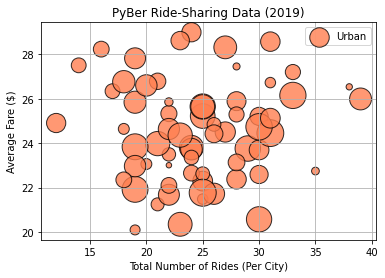

In [16]:
# We will create separate Bubble charts for each city type, then merge them into one
# Build a Bubble chart for Urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()

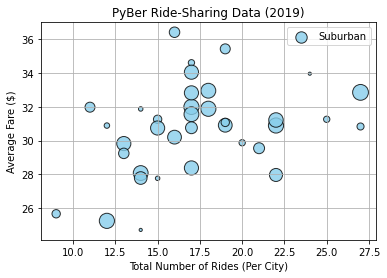

In [17]:
# Build a Bubble chart for Suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()

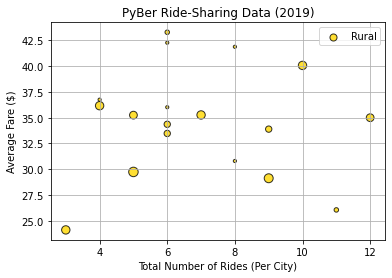

In [18]:
# Build a Bubble chart for Rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend()
plt.grid()

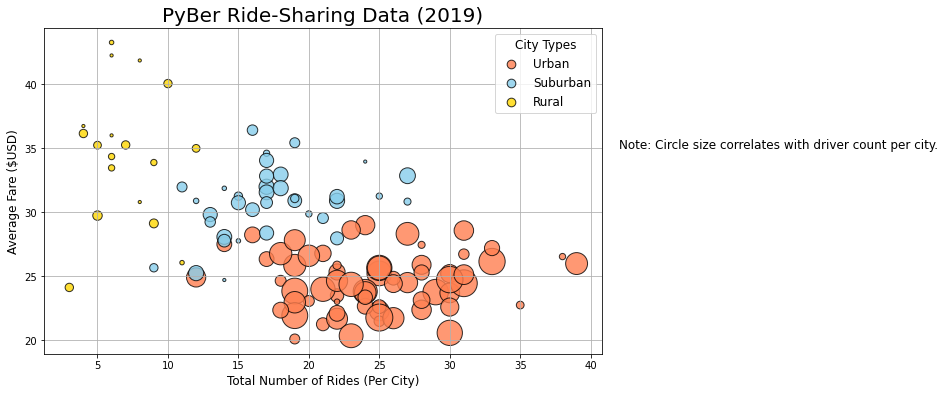

In [19]:
# Add the bubble charts for each type of city, make the whole thing bigger to spread out markers

plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Incorporate other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($USD)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid()

# Create and format legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize=12)

# Save the figure
plt.savefig(r"C:\Users\aleah\Class\PyBer_Analysis\Analysis/Fig1.png")

In [20]:
# Get summary statistics (Urban cities)
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [21]:
# Get summary statistics (Suburban cities)
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [22]:
# Get summary statistics (Rural cities)
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [23]:
# Get summary statistics of ride count for each city type (Urban)
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [24]:
# Summary statistics of ride count (Suburban cities)
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [25]:
# Summary statistics of ride count (Rural cities)
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [26]:
# Calculate mean ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [27]:
# Calculate the median of ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [31]:
# Calculate the mode of the ride count for each city type
(urban_ride_count.mode()), (suburban_ride_count.mode()), (rural_ride_count.mode())

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [36]:
# Import Numpy and the stats module from SciPy (another way to get measures of central tendency if working in Python interpreter or VS Code environment)
import numpy as np
import scipy.stats as sts

In [39]:
# Calculate the measures of central tendency for the ride count for Urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [40]:
# Calculate the measures of central tendency for the ride count for Subrban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for Rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [42]:
# Get the fares for the Urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [43]:
# Calculate measures of central tendency for average fare for Urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [46]:
# Get the fares for Suburban cities
suburban_fares = suburban_cities_df["fare"]

In [47]:
# Calculate measures of central tendency for average fare for Suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [50]:
# Get the fares for Rural cities
rural_fares = rural_cities_df["fare"]

In [52]:
# Calculate measures of central tendency for average fare for Rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [56]:
# Get the driver count data for each city type
urban_drivers = urban_cities_df["driver_count"]

suburban_drivers = suburban_cities_df["driver_count"]

rural_drivers = rural_cities_df["driver_count"]

(urban_drivers.head()), (suburban_drivers.head()), (rural_drivers.head())

(0     5
 1    72
 2    57
 3    34
 4    46
 Name: driver_count, dtype: int64,
 1625    11
 1626    20
 1627    22
 1628    19
 1629    12
 Name: driver_count, dtype: int64,
 2250    9
 2251    8
 2252    6
 2253    2
 2254    2
 Name: driver_count, dtype: int64)

In [61]:
# Calculate summary stats for urban, suburban, and rural driver count
# Urban driver count stats
mean_urban_drivers_count = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers_count:.0f}.")

median_urban_drivers_count = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers_count:.0f}.")

mode_urban_drivers_count = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers_count}.")

# Suburban driver count stats
mean_suburban_drivers_count = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers_count:.0f}.")

median_suburban_drivers_count = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers_count:.0f}.")

mode_suburban_drivers_count = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers_count}.")

# Rural driver count stats
mean_rural_drivers_count = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers_count:.0f}.")

median_rural_drivers_count = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers_count:.0f}.")

mode_rural_drivers_count = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers_count}.")


The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.
The mode driver count for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.
The mode driver count for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.
The mode driver count for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


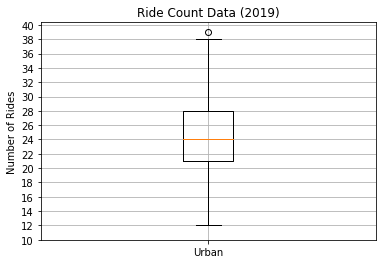

In [62]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels=["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()


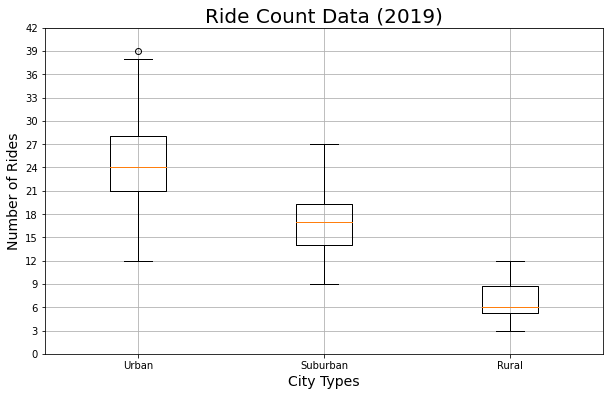

In [64]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Count Data (2019)", fontsize=20)

ax.set_ylabel("Number of Rides", fontsize=14)

ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0,45, step=3.0))

ax.grid()

# Save the figure
plt.savefig(r"C:\Users\aleah\Class\PyBer_Analysis\Analysis/Fig2.png")


In [65]:
# Get the city that matches 39 (our outlier value)
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

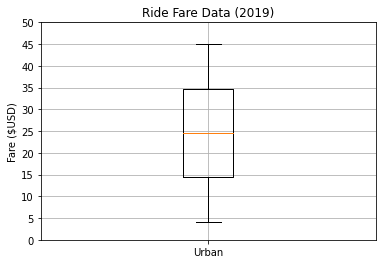

In [66]:
# Create a box-and-whisker plot for the urban fare data
x_labels=["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis, and grid
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()

print("Summary Statistics")
urban_fares.describe()

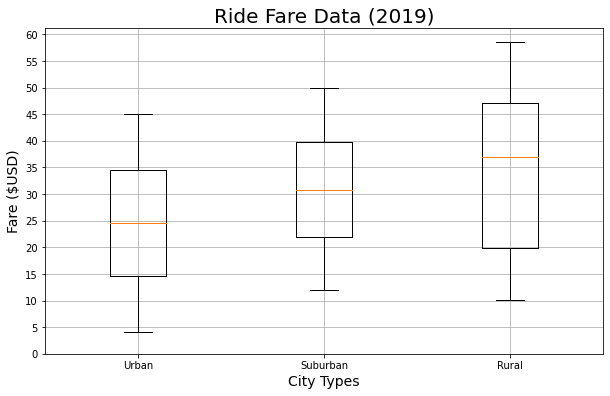

In [69]:
# Create and add box-and-whisker plots for Fare to the same graph
x_labels = ["Urban", "Suburban", "Rural"]

fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Ride Fare Data (2019)", fontsize=20)

ax.set_ylabel("Fare ($USD)", fontsize=14)

ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(fare_data, labels=x_labels)

ax.set_yticks(np.arange(0,61, step=5.0))

ax.grid()

plt.savefig(r"C:\Users\aleah\Class\PyBer_Analysis\Analysis/Fig3.png")

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

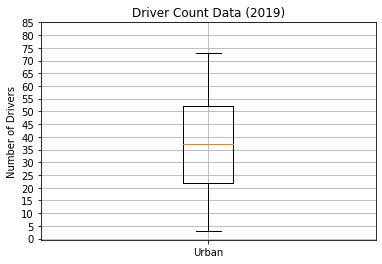

In [71]:
# Create a box-and-whisker plot for the Urban driver count data (using urban_drivers series we made earlier)
x_labels=["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Add the title, y-axis label and grid
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,90, step=5.0))
ax.grid()

print("Summary Statistics")
urban_drivers.describe()

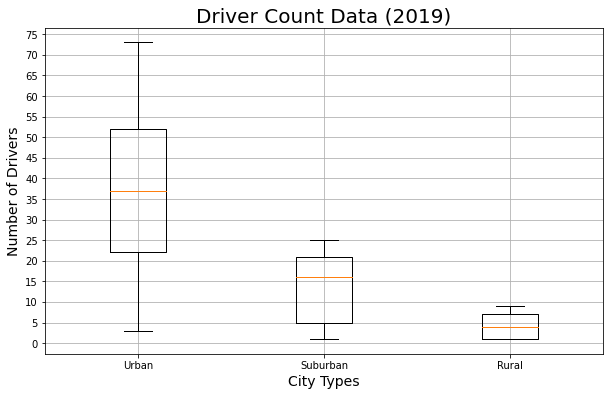

In [73]:
# Create and add box-and-whisker plots for each city type's Driver count data to the same graph
x_labels = ["Urban", "Suburban", "Rural"]

driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Driver Count Data (2019)", fontsize=20)

ax.set_ylabel("Number of Drivers", fontsize=14)

ax.set_xlabel("City Types", fontsize=14)

ax.boxplot(driver_data, labels=x_labels)

ax.set_yticks(np.arange(0,76, step=5.0))

ax.grid()

plt.savefig(r"C:\Users\aleah\Class\PyBer_Analysis\Analysis/Fig4.png")

In [87]:
# Get the sum of the fares for each city type (using groupby function)
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [76]:
# Get the sum of all fares for all city types
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [88]:
# Calculate percentage of fare for each city type
type_percents = 100* sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

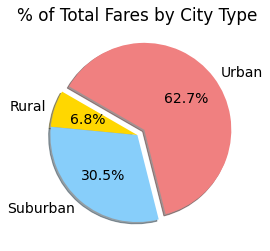

In [93]:
# Build the percentage of fares by city type Pie Chart, add features
# Import matplotlib to change the plot configurations using rcParams (change fontsize)
import matplotlib as mpl
plt.pie(type_percents, 
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       shadow=True,
       startangle=150)
plt.title("% of Total Fares by City Type")
# Change default font size from 10 to 14
mpl.rcParams["font.size"]=14

# Save figure
plt.savefig(r"C:\Users\aleah\Class\PyBer_Analysis\Analysis/Fig5.png")